In [1]:
# Importamos las librerias relevantes
import pandas as pd
import os



# Convertimos los 12 archivos que tenemos de meses en uno solo


In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir("./Sales_Data")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
# Convertimos todo el archivo ya concatenado en un csv para poder ejecutarlo de una forma mas profesional
all_months_data.to_csv("all_data.csv", index = False)

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Limpieza de los datos


In [4]:
# Hay que limpiar los valores NAN
nan_values = all_data[all_data.isna().any(axis=1)]
nan_values

all_data = all_data.dropna(how = "all")



In [5]:
# Buscar los valores "Or" y quitarlos
all_data = all_data[all_data['Order Date'].str[0:2] != "Or"]


In [6]:
# Sacamos una columna exclusivamente para mes
all_data['Month'] = all_data['Order Date'].str[0:2]

# Convertir de string a number
all_data['Month'] = all_data['Month'].astype("int32")



In [7]:
# Convertimos a valores numericos las columnas "Quantity Ordered" y "Price Each"
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

all_data["Sales"] = all_data["Quantity Ordered"] * all_data['Price Each']

In [8]:

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Tarea 4: Agregar una columna de ciudad


In [9]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(" ")[1]
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


# Prugunta #1 ¿Cual fue el mejor mes en ventas? ¿Cuanto se consiguio en ventas ese mes?

In [10]:
results = all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


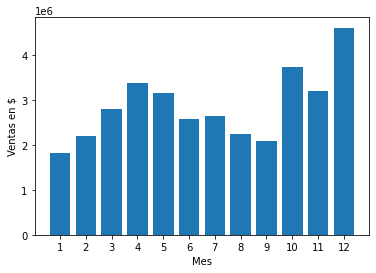

In [11]:
# Importamos matplotlib para mostrar los resultados
import matplotlib.pyplot as plt

months = range(1, 13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.xlabel("Mes")
plt.ylabel("Ventas en $")
plt.show()

### Observando la grafica podemos decir que el mayor numero de ventas, es diciembre, esto puede deberse a fiestas decembrinas como navidad

# Prugunta #2 ¿Que ciudad tuvo el mayor numero de ventas?

In [12]:
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


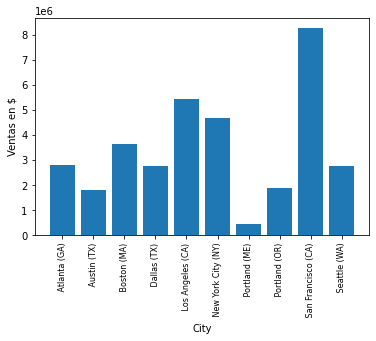

In [13]:
# Con este metodo, podemos notar que los valores de x no estan en el orden correcto, por lo que hay que aplicar un metodo for
# cities = all_data['City'].unique()

cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation="vertical", size=8)
plt.xlabel("City")
plt.ylabel("Ventas en $")
plt.show()

# Prugunta #3 ¿En que hora del dia es el mejor momento para sacar publicidad para que el cliente haga compra de un producto?


In [14]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [15]:
# Transformamos la columna "Order Date" a formato de date time
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [16]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data['Count'] = 1
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20,56,1
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16,0,1
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7,39,1
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17,30,1


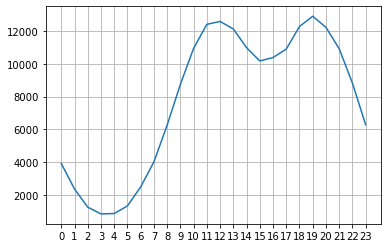

In [23]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

# Podemos analizar que las mejores horas son entre 11AM-13PM Y 18PM-19PM

###  Podemos analizar que las mejores horas son entre 11AM-13PM Y 18PM-19PM

# Prugunta #4 ¿Que conjunto de productos es el que mejor se vende?

In [25]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


In [34]:
# El keep=False es para conservar todos los elementos duplicados
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Ordered'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x) )

df = df[['Order ID', 'Ordered']].drop_duplicates()

df.head()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8136\3761823544.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ordered'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x) )


,Order ID,Ordered
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


### Hacemos el conteo de cada par de productos


In [40]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Ordered']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key, value in count.most_common(10):
    print(key,value)
    
# Podemos definir que los articulos en conjunto que mas se venden son el Iphone y el Lightning charging cable    

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


###  Podemos analizar que el par de productos mas vendido 

# Prugunta #5 ¿Que producto es el que mas se vende?

In [48]:
products_group = all_data.groupby('Product')

quantity_ordered = products_group.sum()['Quantity Ordered']


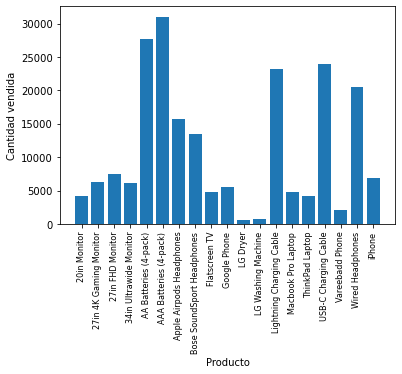

In [51]:
products = [product for product, df in products_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation="vertical", size=8)
plt.xlabel("Producto")
plt.ylabel("Cantidad vendida")
plt.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8136\629155652.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size=9)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

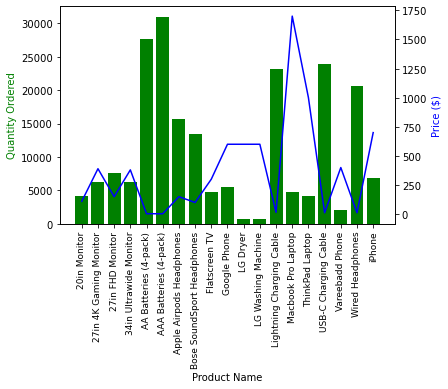

In [58]:
# Sacamos el precio de cada producto de forma individual y lo agregamos al grafico

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='green')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel("Product Name")
ax1.set_ylabel('Quantity Ordered', color='g')

ax2.set_ylabel('Price ($)', color = 'b')

ax1.set_xticklabels(products, rotation = 'vertical', size=9)

###  Podemos observar en nuestra grafica que los productos que mas se venden son las baterias AA y AAA, esto debido al alto uso que tienen dia con dia y que son relativamente baratas de conseguir